In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# 📌 1️⃣ Caricamento del Dataset
file_path = "E:\\Download-E\\Progetto-Uni\\Progetto-SA-YT\\data\\raw\\YoutubeCommentsDataSet.csv"
df = pd.read_csv(file_path, encoding='utf-8')

# Rinominiamo le colonne per evitare errori
df = df.rename(columns={'Comment': 'text', 'Sentiment': 'sentiment'})

# 📌 2️⃣ Pulizia e Preparazione dei Dati, Controllo dei Missing
df = df.dropna()  # Rimuove righe con valori mancanti
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0,'neutral': 2})  # Converte sentiment in numerico


"""
# Inizializziamo l'IterativeImputer (MICE)
imputer = IterativeImputer(random_state=42)

# Applicare l'imputer solo sulla colonna 'sentiment' che ha i valori mancanti
df_imputed = df.copy()  # Copia del DataFrame originale per evitare modifiche dirette
df_imputed['sentiment'] = imputer.fit_transform(df[['sentiment']])

"""
df_imputed=df
df_imputed['sentiment'] = df_imputed['sentiment'].apply(lambda x: 0 if x < 0.5 else (1 if x < 1.5 else 2))
"""
# Verifica che l'imputation abbia funzionato
print("\nValori mancanti dopo l'imputation:")
print(df_imputed.isnull().sum())

# Visualizza le prime righe del dataset con i valori imputati
print("\nPrime righe del dataset con i valori imputati:")
print(df_imputed.head())
"""
# Salviamo il dataframe imputed su un nuovo file
df_imputed.to_csv("E:\\Download-E\\Progetto-Uni\\Progetto-SA-YT\\data\\raw\\YoutubeComments_imputed.csv", index=False)
df=df_imputed

print(df['sentiment'].value_counts()) #controllo che il caso di commento neghativo non sia troppo raro.






sentiment
1    11402
2     4625
0     2337
Name: count, dtype: int64


{0, 1, 2}

📊 Logistic Regression
Accuracy: 0.7013, Precision: 0.6809, Recall: 0.4541, F1-score: 0.4509
CV Mean Accuracy: 0.6724, CV Std Accuracy: 0.0037
Matrice di Confusione:
[[  14  356   71]
 [   1 2222   97]
 [   6  566  340]]

📊 Confronto tra modelli:
               Modello  Accuracy  Precision    Recall  F1-score  \
0  Logistic Regression  0.701334     0.6809  0.454104  0.450934   

   CV Mean Accuracy  CV Std Accuracy  
0          0.672385           0.0037  

📊 Random Forest
Accuracy: 0.6414, Precision: 0.4995, Recall: 0.3480, F1-score: 0.2893
CV Mean Accuracy: 0.6257, CV Std Accuracy: 0.0011
Matrice di Confusione:
[[   0  441    0]
 [   0 2313    7]
 [   0  869   43]]

📊 Confronto tra modelli:
               Modello  Accuracy  Precision    Recall  F1-score  \
0  Logistic Regression  0.701334   0.680900  0.454104  0.450934   
1        Random Forest  0.641438   0.499474  0.348044  0.289264   

   CV Mean Accuracy  CV Std Accuracy  
0          0.672385          0.00370  
1        

C:\Users\nadae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nadae\AppData\Local\Temp\ipykernel_17420\4093197856.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


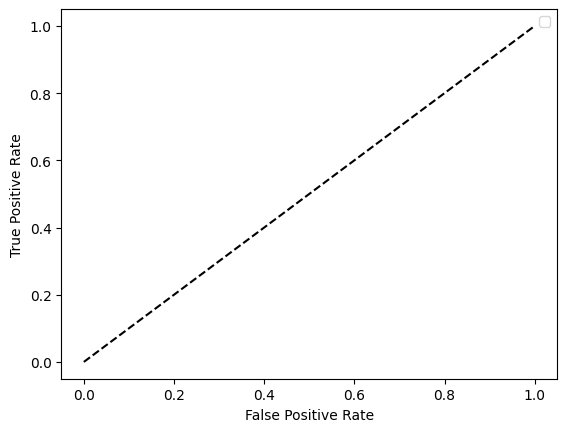

In [35]:
# 📌 3️⃣ Separazione in Training e Test Set
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)
print(set(y_train))

# 📌 4️⃣ Feature Engineering: Trasformiamo i testi in vettori numerici
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# 📌 5️⃣ Modelli di Machine Learning
models = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
}

# 📌 6️⃣ Calcoliamo e stampiamo le metriche con Cross-Validation

metrics = []
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    mean_cv_score = cv_scores.mean()  # Media della cross-validation
    std_cv_score = cv_scores.std()   # Deviazione standard della cross-validation

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')  # Adatto per il multiclass
    rec = recall_score(y_test, y_pred, average='macro')  # Adatto per il multiclass
    f1 = f1_score(y_test, y_pred, average='macro')  # Adatto per il multiclass

    metrics.append([name, acc, prec, rec, f1,mean_cv_score,std_cv_score])

    print(f"\n📊 {name}")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")
    print(f"CV Mean Accuracy: {mean_cv_score:.4f}, CV Std Accuracy: {std_cv_score:.4f}")

    # Stampa la matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matrice di Confusione:\n{cm}")

# 📌 Tabella di confronto tra modelli
    metrics_df = pd.DataFrame(metrics, columns=["Modello", "Accuracy", "Precision", "Recall", "F1-score","CV Mean Accuracy","CV Std Accuracy"])
    print("\n📊 Confronto tra modelli:")
    print(metrics_df)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
